# Nest Tutorial 1

In [1]:
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## First Neuron
Integrate-and-fire neuron with alpha-shaped postsynaptic currents

In [2]:
neuron = nest.Create("iaf_psc_alpha")

In [3]:
# neuron.get()
# neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [4]:
# neuron.set(I_e=376.0)
neuron.I_e = 376.0
neuron.I_e

376.0

In [5]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [6]:
spikerecorder = nest.Create("spike_recorder")

In [7]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [8]:
nest.Simulate(1000.0)


Nov 26 16:59:27 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 26 16:59:27 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 26 16:59:27 SimulationManager::run [Info]: 
    Simulation finished.


In [9]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

In [10]:
print(ts.shape)
print(Vms.shape)

(999,)
(999,)


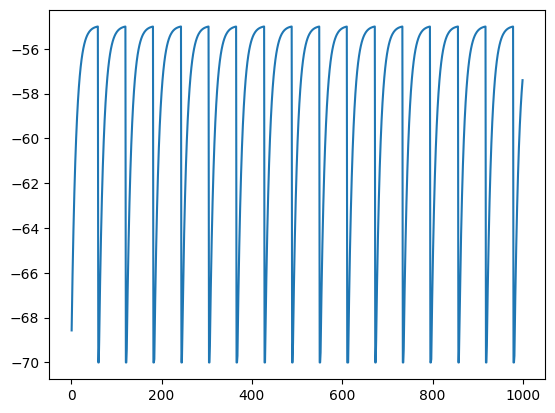

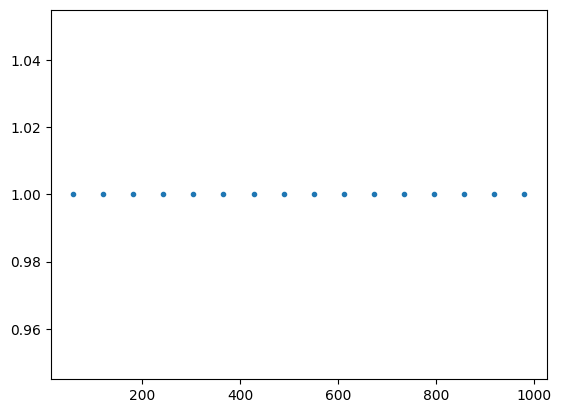

In [11]:
plt.figure(1)
plt.plot(ts, Vms)
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

## Second Neuron
Integrate-and-fire neuron with constant input current.

In [12]:
neuron2 = nest.Create("iaf_psc_alpha")
neuron2.set({"I_e": 370.0})

In [13]:
nest.Connect(multimeter, neuron2)

In [14]:
nest.Simulate(1000.0)


Nov 26 16:59:27 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 26 16:59:27 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 26 16:59:27 SimulationManager::run [Info]: 
    Simulation finished.


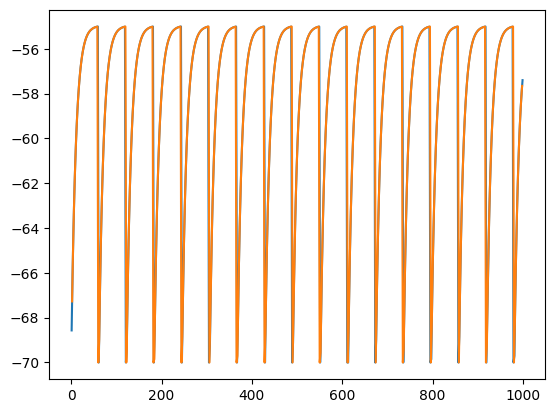

In [15]:
plt.figure(3)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
plt.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
plt.plot(ts2, Vms2)

## Neuron 3 
Integrate-and-fire neuron with:
- constant input current
- one inhibitory, one excitatory Poisson spike train

In [16]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

In [18]:
neuron3 = nest.Create("iaf_psc_alpha")
neuron3.set(I_e=0.0)
multimeter3 = nest.Create("multimeter")
multimeter3.set(record_from=["V_m"])
spikerecorder3 = nest.Create("spike_recorder")
nest.Connect(multimeter3, neuron3)
nest.Connect(neuron3, spikerecorder3)

syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
nest.Connect(noise_ex, neuron3, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron3, syn_spec=syn_dict_in)

In [19]:
nest.Simulate(1000.0)


Nov 26 16:59:51 NodeManager::prepare_nodes [Info]: 
    Preparing 9 nodes for simulation.

Nov 26 16:59:51 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 9
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 26 16:59:51 SimulationManager::run [Info]: 
    Simulation finished.


In [20]:
dmm3 = multimeter3.get()
Vms3 = dmm3["events"]["V_m"]
ts3 = dmm3["events"]["times"]

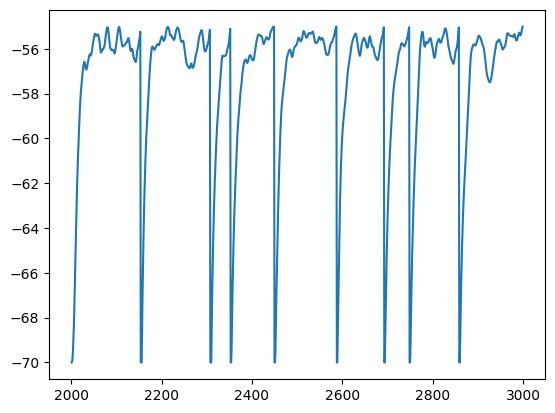

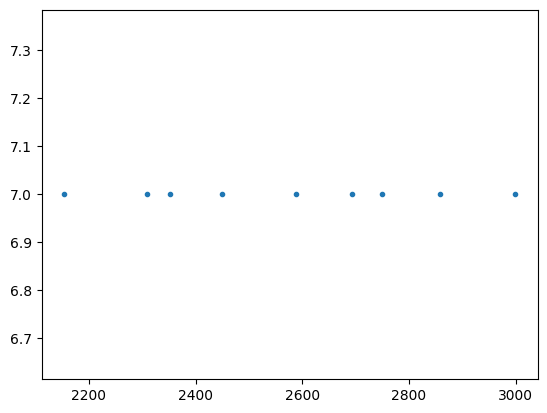

In [22]:
plt.figure(4)

plt.plot(ts3, Vms3)
events3 = spikerecorder3.get("events")
senders3 = events3["senders"]
st3 = events3["times"]
plt.figure(5)
plt.plot(st3, senders3, ".")
plt.show()

## Two Connected Neurons
Integrate-and-fire neurons:
- Neuron 1 with constant input current
- Neuron 2: I assume without constant input current???

In [24]:
n1 = nest.Create("iaf_psc_alpha")
n1.set(I_e=376.0)
n2 = nest.Create("iaf_psc_alpha")
m1 = nest.Create("multimeter")
m1.set(record_from=["V_m"])

nest.Connect(n1, n2, syn_spec = {"weight":20.0}) # default delay is 1 ms, syn_spec={"weight":20.0, "delay":1.0}
nest.Connect(m1, n2)

In [25]:
nest.Simulate(1000.0)
dmm1 = m1.get()
Vms1 = dmm1["events"]["V_m"]
ts1 = dmm1["events"]["times"]


Nov 26 17:15:50 NodeManager::prepare_nodes [Info]: 
    Preparing 12 nodes for simulation.

Nov 26 17:15:50 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 12
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 26 17:15:50 SimulationManager::run [Info]: 
    Simulation finished.


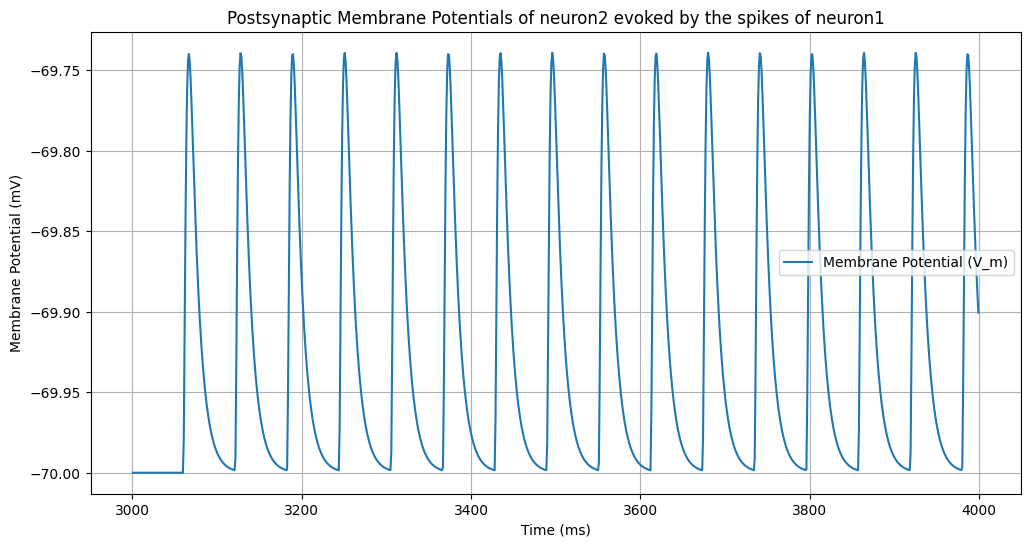

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(ts1, Vms1, label="Membrane Potential (V_m)")
plt.title("Postsynaptic Membrane Potentials of neuron2 evoked by the spikes of neuron1")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()

plt.show()